### Importing Libraries

In [19]:
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
import psutil

In [20]:
start_time = time.time()

### Fetch Dataset

In [21]:
iris_data = pd.read_csv('iris.data', header = None)
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

#### Check for missing values 

In [22]:
iris_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### Drop the Class Labels

In [23]:
iris = iris_data.drop(4, axis=1)
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Standardize the dataset 

In [24]:
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris)

## KMeans Clustering

### Perform KMeans Clustering

In [25]:
km = KMeans(n_clusters=3)
km.fit(scaled_iris)
labels = km.labels_

In [26]:
iris_data[5] = labels
iris_data.head()

,0,1,2,3,4,5
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


### Determine Optimum Value of K using Elbow Method

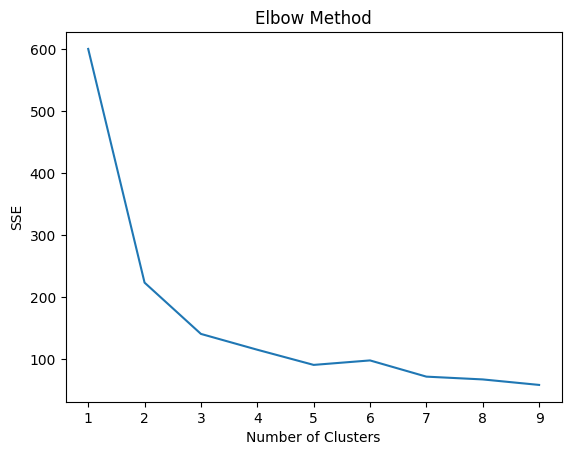

In [27]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_iris)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


### Getting the Cluster Centers

In [28]:
centroids = km.cluster_centers_

### Plot Clusters

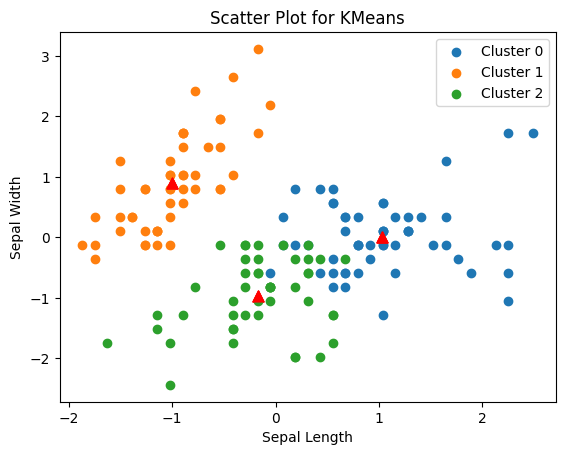

In [29]:
fig, ax = plt.subplots()

for i in range(3):
    temp = (iris_data.iloc[:, 5] == i)
    ax.scatter(scaled_iris[temp, 0], scaled_iris[temp, 1], label='Cluster ' + str(i))
    ax.scatter(centroids[:, 0], centroids[:, 1], marker = '^', s=60, color = 'red')

ax.legend()
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')  
plt.title('Scatter Plot for KMeans')
plt.show()

In [30]:
km.inertia_

142.1106371310419

### Accuracy of KMeans

In [31]:
from sklearn.metrics import accuracy_score
original_labels = iris_data[5]

def np_mode(arr):
    vals, counts = np.unique(arr, return_counts=True)
    return vals[np.argmax(counts)]

mapped_labels = np.zeros_like(labels)

for i in range(3):  
    mask = (labels == i)
    mapped_labels[mask] = np_mode(original_labels[mask])


accuracy = accuracy_score(original_labels, mapped_labels)
print(f"Clustering accuracy: {accuracy:.2f}")

Clustering accuracy: 1.00


## DBSCAN

### Perform DBSCAN Clustering

In [32]:
dbscan = DBSCAN(eps=.5, min_samples=2).fit(scaled_iris)
labels = dbscan.labels_

In [33]:
iris_data[6] = labels
iris_data

,0,1,2,3,4,5,6
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0,5


### Plot Clusters

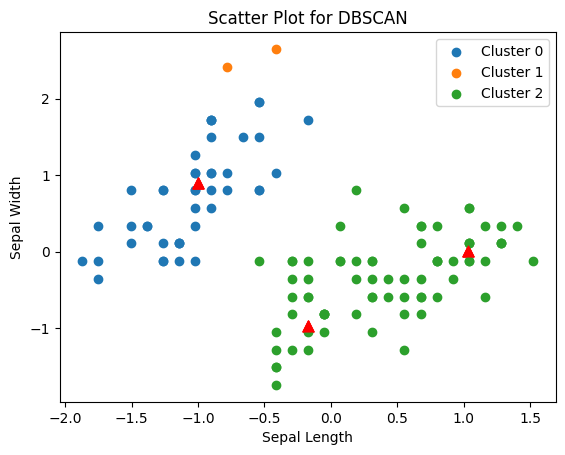

In [34]:
fig, ax = plt.subplots()

for i in range(3):
    temp = (iris_data.loc[:, 6] == i)
    ax.scatter(scaled_iris[temp, 0], scaled_iris[temp, 1], label='Cluster ' + str(i))
    ax.scatter(centroids[:, 0], centroids[:, 1], marker = '^', s=60, color = 'red')

ax.legend()
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')  
plt.title('Scatter Plot for DBSCAN')
plt.show()

### Accuracy of DBSCAN

In [35]:
mapped_labels = np.zeros_like(labels)

for i in range(3):  
    mask = (labels == i)
    mapped_labels[mask] = np_mode(original_labels[mask])


accuracy = accuracy_score(original_labels, mapped_labels)
print(f"Clustering accuracy: {accuracy:.2f}")

Clustering accuracy: 0.67


## Information

In [36]:
memory_info = psutil.virtual_memory()
used_memory = memory_info.used / (1024 ** 2)
end_time = time.time()
runtime = end_time - start_time

print(f"Current Memory Usage: {used_memory} MB")
print(f"Runtime for Notebook: {runtime:.4f} seconds")

Current Memory Usage: 7616.625 MB
Runtime for Notebook: 1.5788 seconds
